# Tiri per Squadra

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from PIL import Image
import scipy.stats as stats
import urllib
import os
import numpy as np

In [2]:
font_path = "../Grafici/assets/fonts/"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../Grafici/assets/stylesheets/soc_base.mplstyle")

## I Dati

In [3]:
df = pd.read_csv("./data/shooting.csv", sep='\t').set_index('Rk')[['Player', 'Gls', 'Sh', '90s']]
df = df[df['90s'] >= 9]

In [4]:
def remove_noGls_noSh(df):
    for i in df.index:
        if df.loc[i].Gls == 0 or df.loc[i].Sh == 0:
            df.drop(i, inplace=True)
remove_noGls_noSh(df)

def per_90(x, n):
    return x/n
    
df = df.assign(Gls_90 = lambda x: x.Gls/x["90s"])
df = df.assign(Sh_90 = lambda x: x.Sh/x["90s"])
df

,Player,Gls,Sh,90s,Gls_90,Sh_90
Rk,,,,,,
3,Tammy Abraham,8,62,24.1,0.331950,2.572614
7,Michel Aebischer,1,15,16.1,0.062112,0.931677
10,Ola Aina,1,7,9.3,0.107527,0.752688
12,Jean-Daniel Akpa-Akpro,1,13,14.1,0.070922,0.921986
13,Luis Alberto,5,43,26.1,0.191571,1.647510
...,...,...,...,...,...,...
575,Duván Zapata,2,41,15.5,0.129032,2.645161
576,Davide Zappacosta,4,24,15.4,0.259740,1.558442
581,Piotr Zieliński,3,52,24.7,0.121457,2.105263


## Visual

In [5]:
def plot_line(m, ax, **kwargs):
    op = lambda x: m*x
    x = [ax.get_ylim()[0]-5, ax.get_xlim()[1]+5]
    ax.plot(x, [op(x[0]), op(x[1])], **kwargs)

def ann(ax, pl, x=0, y=0):
    for i in pl.iloc:
        ax.annotate(i.Player, xy=(0,0), xytext=(i.Sh_90+x, i.Gls_90+y), 
                    color = "black", font = "DM Sans", weight = "bold",
                   path_effects=[path_effects.Stroke(linewidth=2, foreground=fig.get_facecolor()), 
                path_effects.Normal()], fontsize=12)


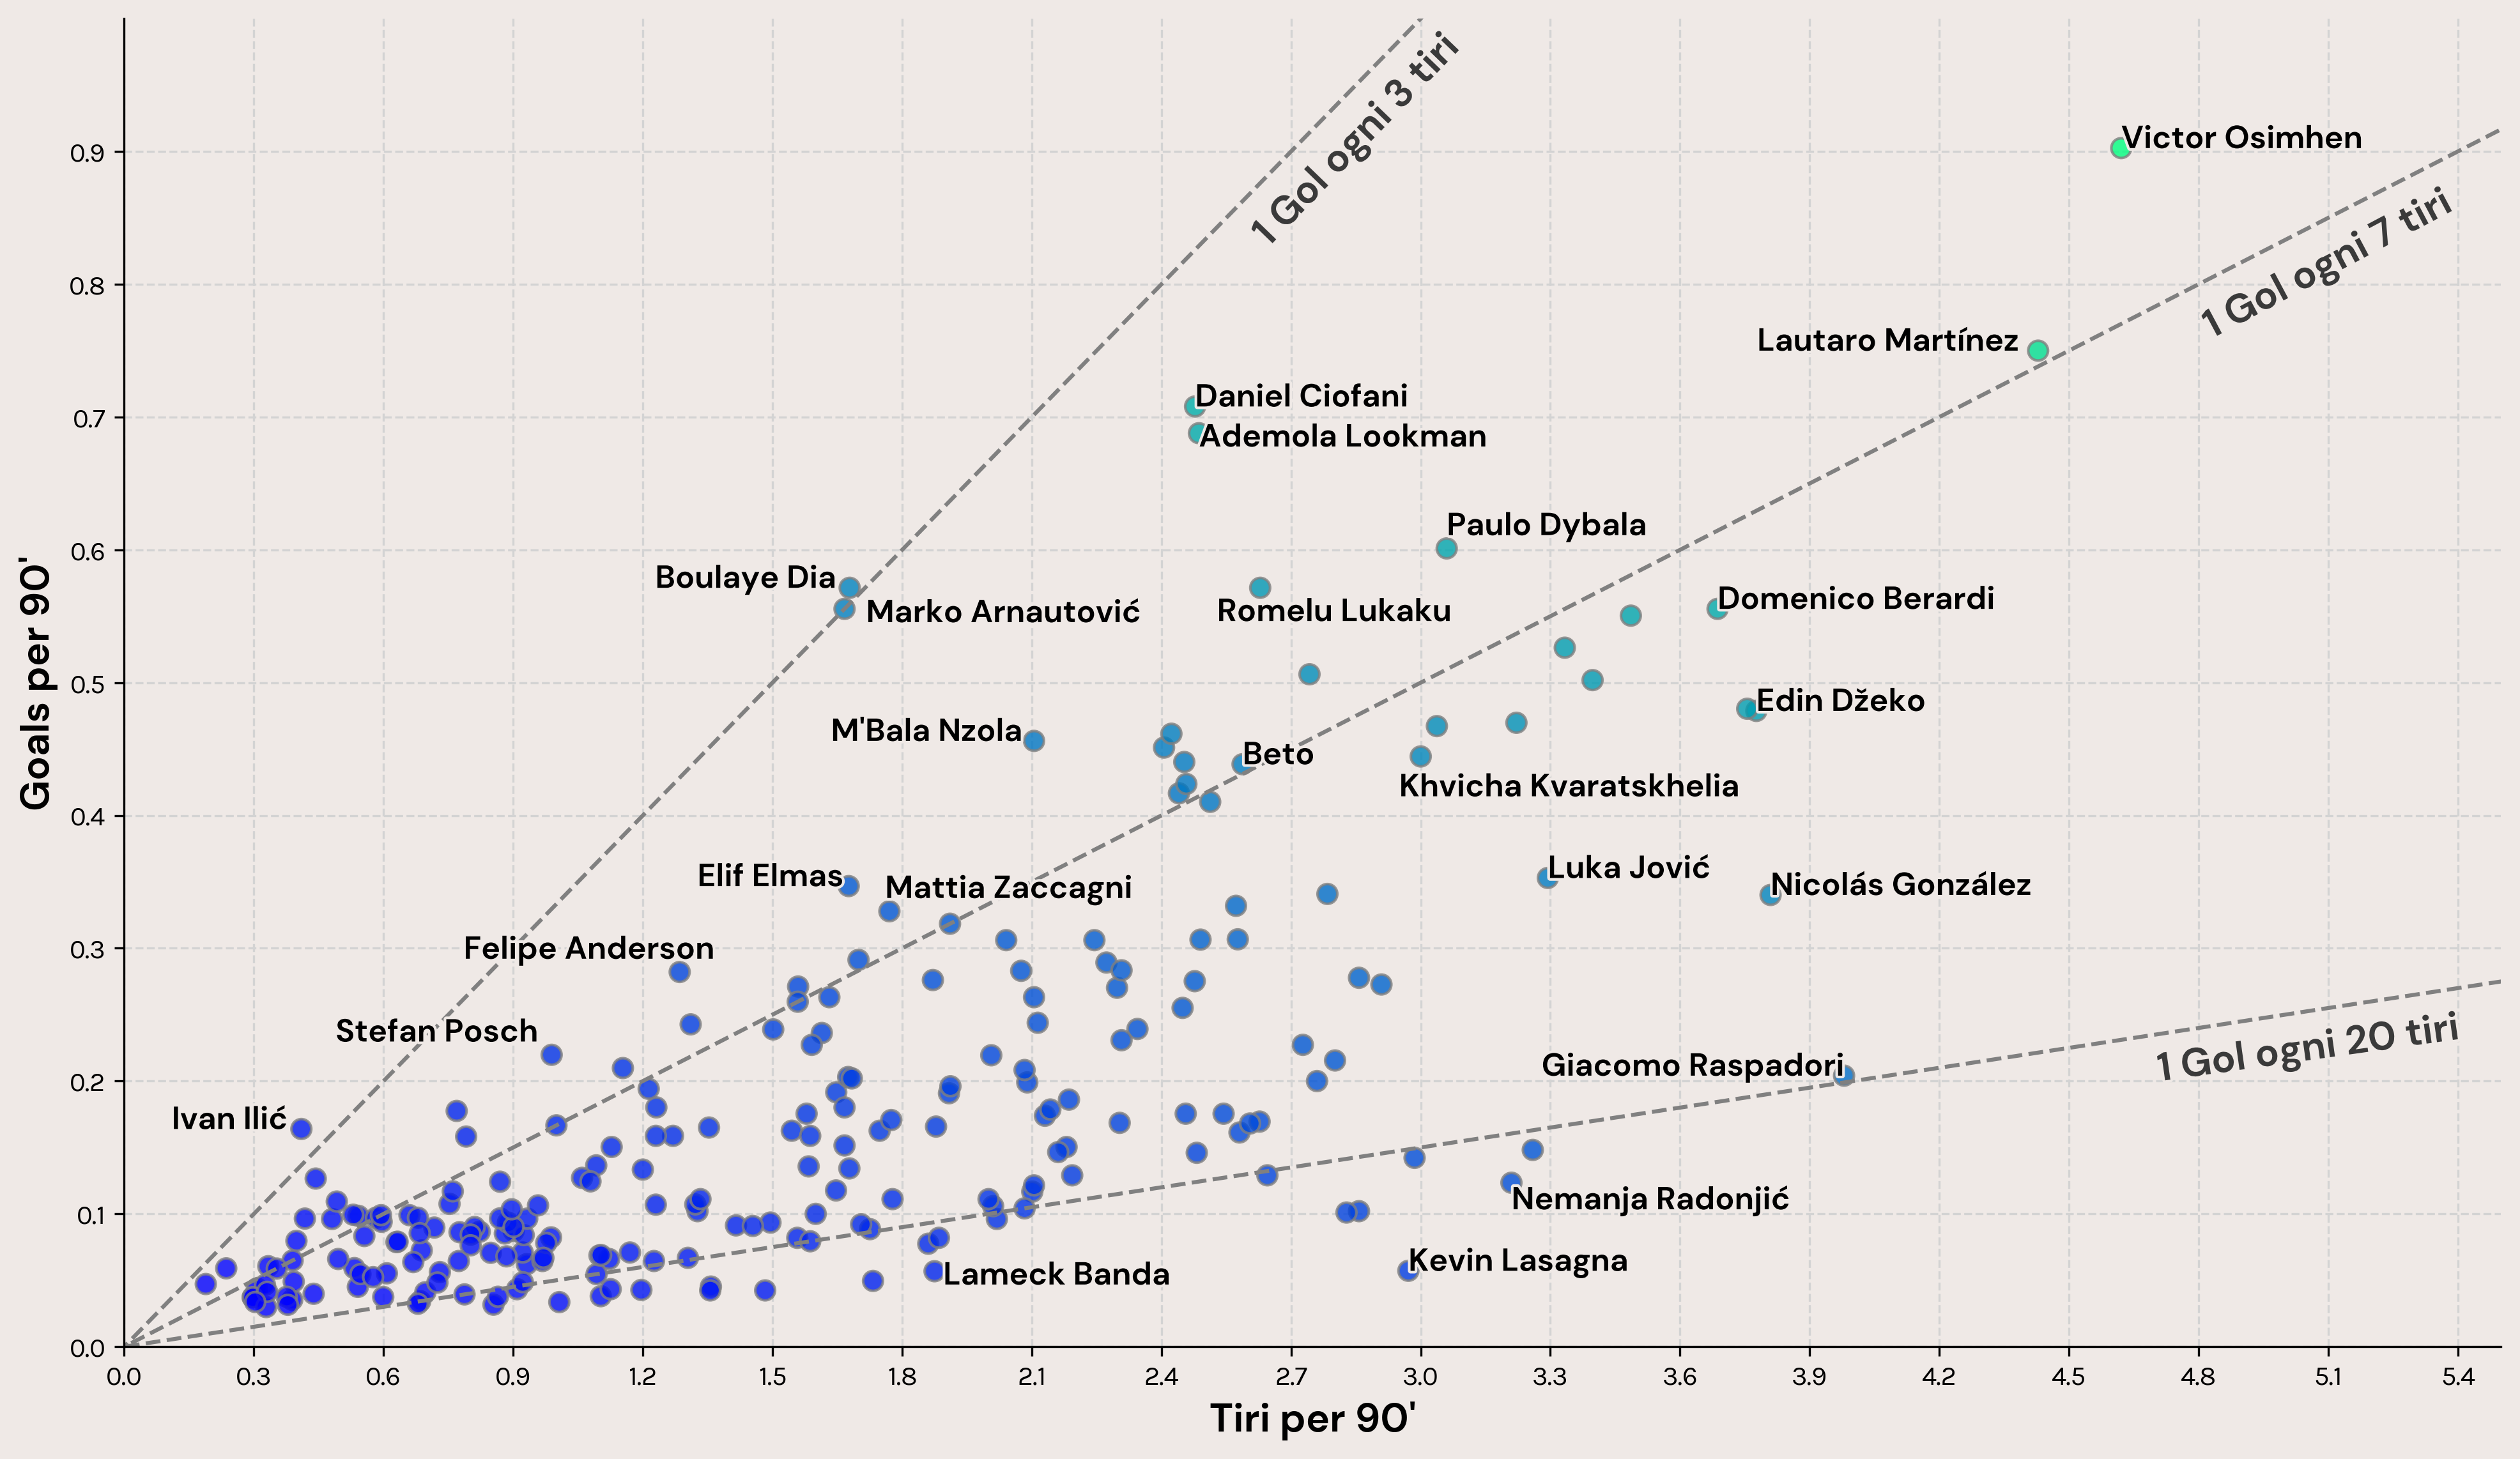

In [9]:
p = 0.4
df['zscore'] = stats.zscore(df.Sh_90)*p + stats.zscore(df.Gls_90)*(1-p)
                            
fig = plt.figure(figsize=(16, 9), dpi=300)
ax = plt.subplot()
ax.grid(visible=True, ls='--', color='lightgrey')

ax.set_ylabel("Goals per 90'", fontsize = 15, color = "black", font = "DM Sans", weight = "bold")
ax.set_xlabel("Tiri per 90'",fontsize = 15, color = "black", font = "DM Sans", weight = "bold")

ax.xaxis.set_ticks([x for x in np.arange(0, 6, 0.3)])
ax.yaxis.set_ticks([x for x in np.arange(0, 1, 0.1)])


ann(ax, df[df.Player == "Khvicha Kvaratskhelia"], -0.05, -0.03)
ann(ax, df[df.Player == "Victor Osimhen"])
ann(ax, df[df.Player == "Lautaro Martínez"], -0.65, 0)
ann(ax, df[df.Player == "Luka Jović"])
ann(ax, df[df.Player == "Edin Džeko"])
ann(ax, df[df.Player == "Luka Jović"])
ann(ax, df[df.Player == "Beto"])
ann(ax, df[df.Player == "Giacomo Raspadori"], -0.7)


ann(ax, df[(df.Sh_90 > 2.5) & (df.Gls_90 < 0.1)])
ann(ax, df[(df.Sh_90 < 2.7) & (df.Gls_90 > 0.7)])
ann(ax, df[(df.Sh_90 < 2.7) & (df.Gls_90.between(0.68, 0.7))], 0, -0.01)

ann(ax, df[(df.Sh_90 > 3.6) & (df.Gls_90.between(0.5, 0.6))])
ann(ax, df[(df.Sh_90 < 0.6) & (df.Gls_90 > 0.15)], -0.3)
ann(ax, df[(df.Sh_90 < 1.8) & (df.Gls_90 > 0.56)], -0.45)
ann(ax, df[(df.Sh_90 < 1.8) & (df.Gls_90.between(0.5, 0.56))], 0.05, -0.01)
ann(ax, df[(df.Sh_90 > 3.0) & (df.Gls_90.between(0.59, 0.61))], 0, 0.01)
ann(ax, df[(df.Sh_90.between(2.4, 2.7)) & (df.Gls_90.between(0.55, 0.6))], -0.1, -0.025)
ann(ax, df[(df.Sh_90 < 2.2) & (df.Gls_90.between(0.4, 0.5))], -0.47)
ann(ax, df[(df.Sh_90 > 3.65) & (df.Gls_90.between(0.3, 0.4))])
ann(ax, df[(df.Sh_90 > 3.05) & (df.Gls_90 < 0.13)], 0, -0.02)
ann(ax, df[(df.Sh_90 < 1) & (df.Gls_90 > 0.2)], -0.5, 0.01)
ann(ax, df[(df.Sh_90 < 1.3) & (df.Gls_90 > 0.25)], -0.5, 0.01)
ann(ax, df[(df.Sh_90.between(1.8, 1.9)) & (df.Gls_90 < 0.07)], 0.02, -0.01)
ann(ax, df[(df.Sh_90.between(1.5, 1.7)) & (df.Gls_90.between(0.31, 0.4))], -0.35)
ann(ax, df[(df.Sh_90.between(1.6, 1.8)) & (df.Gls_90.between(0.3, 0.33))], -0.01, 0.01)


args = dict(color="#3A3A3A", font="DM Sans", weight="bold",
           path_effects=[path_effects.Stroke(linewidth=2, foreground=fig.get_facecolor()), 
            path_effects.Normal()])

ax.annotate("1 Gol ogni 20 tiri", xy=(0, 0), xytext=(4.7, 0.2), fontsize=15, **args).set_rotation(8)
ax.annotate("1 Gol ogni 7 tiri", xy=(0, 0), xytext=(4.8, 0.76), fontsize=15, **args).set_rotation(28)
ax.annotate("1 Gol ogni 3 tiri", xy=(0, 0), xytext=(2.6, 0.83), fontsize=15, **args).set_rotation(46)


ax.set_ylim(0, 1)
ax.set_xlim(0, 5.5)

ax.scatter(
    df.Sh_90, df.Gls_90,
    c=df['zscore'], cmap='winter', 
    zorder=2, ec='grey', s=55, alpha=0.8
)

plot_line(1/20, ax, color='grey', ls='--')
plot_line(1/6, ax, color='grey', ls='--')
plot_line(1/3, ax, color='grey', ls='--')

plt.savefig(
	"figures/TiriGiocatori.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/TiriGiocatori_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)

